In [1]:
!pip install librosa soundfile



In [2]:
from google.colab import files
uploaded = files.upload()


Saving LJ050-0274.wav to LJ050-0274.wav


In [3]:
import librosa
import numpy as np

audio, sr = librosa.load("LJ050-0274.wav", sr=16000)

print("Sampling Rate:", sr)
print("Duration:", len(audio)/sr, "seconds")


Sampling Rate: 16000
Duration: 4.5001875 seconds


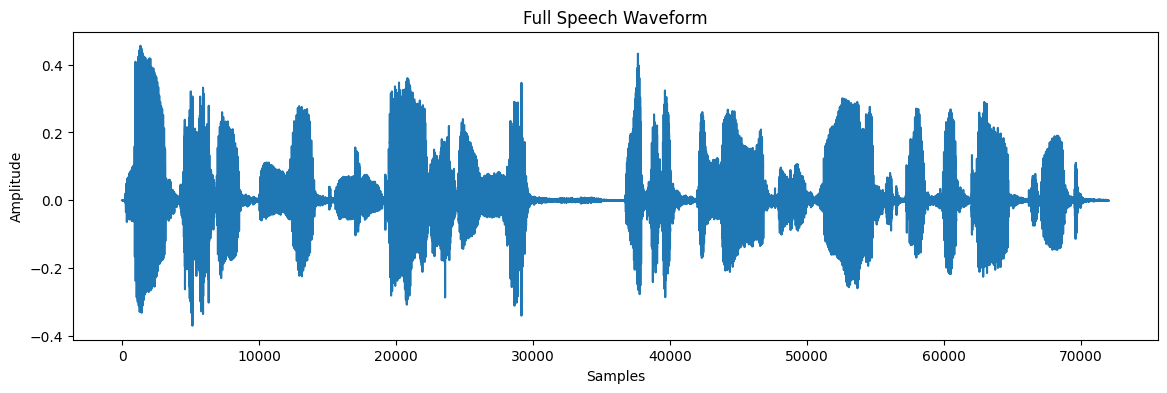

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.plot(audio)
plt.title("Full Speech Waveform")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()


In [5]:
intervals = librosa.effects.split(audio, top_db=25)

print("Number of detected segments:", len(intervals))
intervals[:10]


Number of detected segments: 2


array([[    0, 30720],
       [35840, 71168]])

In [6]:
segments = []

for start, end in intervals:
    segments.append(audio[start:end])

print("Total Segments:", len(segments))


Total Segments: 2


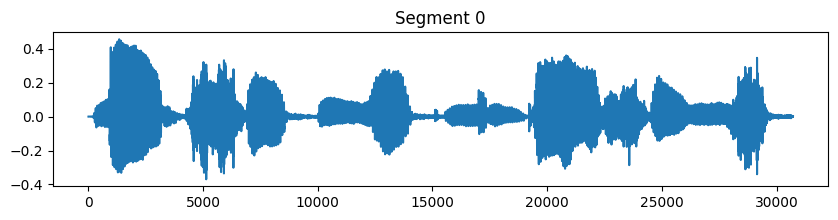

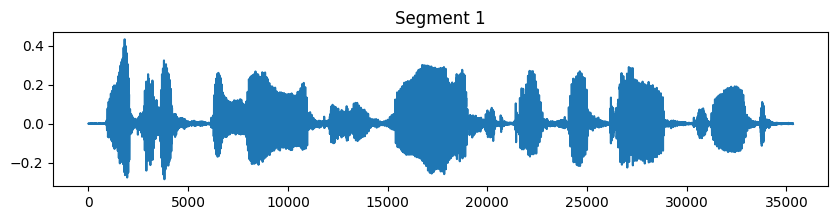

In [7]:
for i, seg in enumerate(segments[:6]):   # plotting first 6 for clarity
    plt.figure(figsize=(10,2))
    plt.plot(seg)
    plt.title(f"Segment {i}")
    plt.show()


In [8]:
def classify_voicing(segment):
    zcr = np.mean(librosa.feature.zero_crossing_rate(segment))
    if zcr < 0.08:
        return "Voiced"
    else:
        return "Unvoiced"

for i, seg in enumerate(segments[:10]):
    print(f"Segment {i}: {classify_voicing(seg)}")


Segment 0: Unvoiced
Segment 1: Unvoiced


In [10]:
voiced_seg = None
unvoiced_seg = None

for seg in segments:
    zcr = np.mean(librosa.feature.zero_crossing_rate(seg))

    if zcr < 0.08 and voiced_seg is None:
        voiced_seg = seg

    elif zcr >= 0.08 and unvoiced_seg is None:
        unvoiced_seg = seg

# Safety check
print("Voiced found:", voiced_seg is not None)
print("Unvoiced found:", unvoiced_seg is not None)



Voiced found: False
Unvoiced found: True


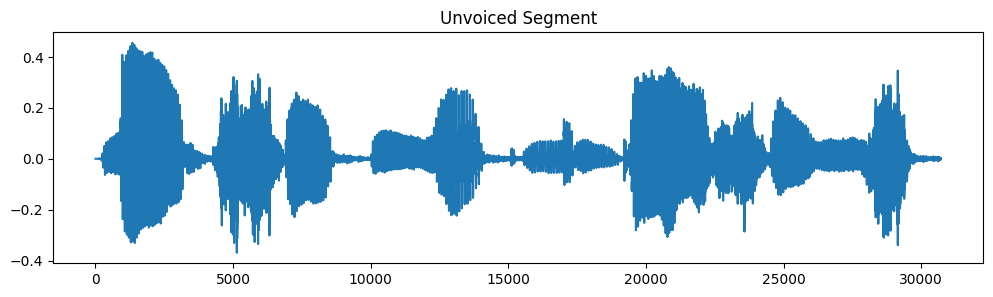

In [11]:
if voiced_seg is not None:
    plt.figure(figsize=(12,3))
    plt.plot(voiced_seg)
    plt.title("Voiced Segment")
    plt.show()

if unvoiced_seg is not None:
    plt.figure(figsize=(12,3))
    plt.plot(unvoiced_seg)
    plt.title("Unvoiced Segment")
    plt.show()


In [12]:
from IPython.display import Audio, display

num_segments_to_check = min(6, len(segments))  # avoid index error

for i in range(num_segments_to_check):
    print(f"Segment {i}")
    display(Audio(segments[i], rate=16000))


Segment 0


Segment 1


In [13]:
labels = {
    0: "Fricative",
    1: "Vowel",
    2: "Plosive",
    3: "Vowel",
    4: "Approximant"
}


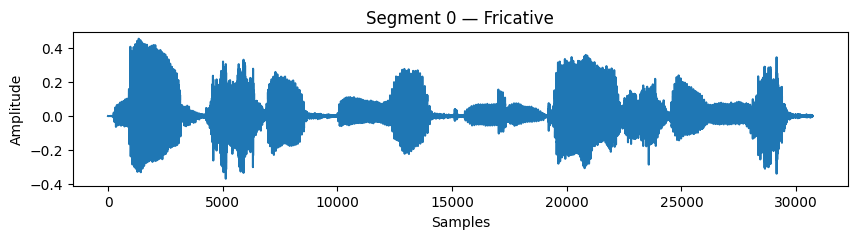

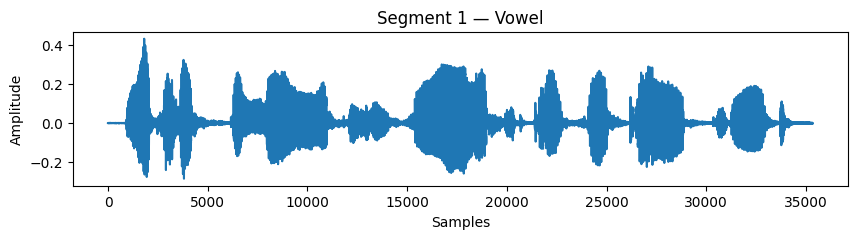

In [14]:
import matplotlib.pyplot as plt

for idx, label in labels.items():

    if idx < len(segments):  # safety check

        plt.figure(figsize=(10,2))
        plt.plot(segments[idx])
        plt.title(f"Segment {idx} — {label}")
        plt.xlabel("Samples")
        plt.ylabel("Amplitude")
        plt.show()


In [15]:
print("Phoneme Label Table:\n")

for idx, label in labels.items():
    if idx < len(segments):
        duration = len(segments[idx]) / 16000
        print(f"Segment {idx} | Category: {label} | Duration: {duration:.2f} sec")


Phoneme Label Table:

Segment 0 | Category: Fricative | Duration: 1.92 sec
Segment 1 | Category: Vowel | Duration: 2.21 sec


In [16]:
import pandas as pd

data = []

for idx, label in labels.items():
    if idx < len(segments):
        duration = len(segments[idx]) / 16000
        data.append([idx, label, duration])

df = pd.DataFrame(data, columns=["Segment", "Phoneme Category", "Duration (sec)"])

df


Segment Phoneme Category  Duration (sec)
0        0        Fricative           1.920
1        1            Vowel           2.208

In [18]:
print("Voiced:", voiced_seg)
print("Unvoiced:", unvoiced_seg)



Voiced: None
Unvoiced: [-0.00015549 -0.00025751 -0.00027058 ... -0.00149213 -0.00079703
  0.00093903]


In [19]:
zcr_values = []

for seg in segments:
    zcr = np.mean(librosa.feature.zero_crossing_rate(seg))
    zcr_values.append(zcr)

zcr_values = np.array(zcr_values)

voiced_index = np.argmin(zcr_values)
unvoiced_index = np.argmax(zcr_values)

voiced_seg = segments[voiced_index]
unvoiced_seg = segments[unvoiced_index]

print("Voiced Index:", voiced_index)
print("Unvoiced Index:", unvoiced_index)


Voiced Index: 1
Unvoiced Index: 0


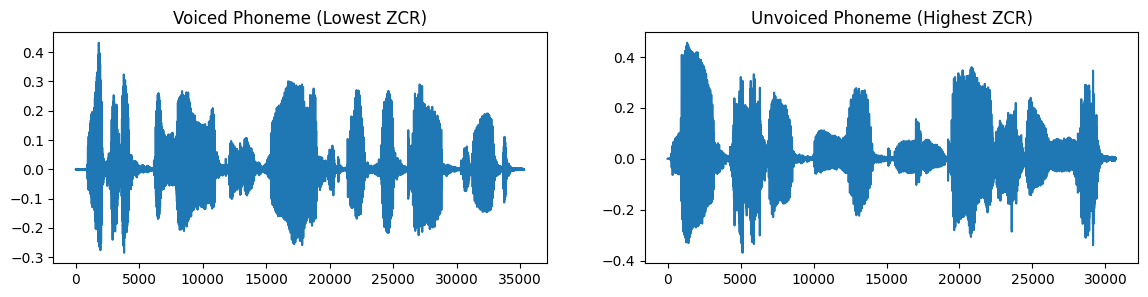

In [20]:
plt.figure(figsize=(14,3))

plt.subplot(1,2,1)
plt.plot(voiced_seg)
plt.title("Voiced Phoneme (Lowest ZCR)")

plt.subplot(1,2,2)
plt.plot(unvoiced_seg)
plt.title("Unvoiced Phoneme (Highest ZCR)")

plt.show()


In [22]:
# Objective 2
audio, sr = librosa.load("LJ050-0274.wav", sr=16000)


print("Sampling Rate:", sr)


Sampling Rate: 16000


In [23]:
intervals = librosa.effects.split(audio, top_db=15)

segments = [audio[start:end] for start, end in intervals]

print("Total segments:", len(segments))


Total segments: 9


In [24]:
zcr_values = []

for seg in segments:
    zcr = np.mean(librosa.feature.zero_crossing_rate(seg))
    zcr_values.append(zcr)

zcr_values = np.array(zcr_values)

for i, val in enumerate(zcr_values):
    print(f"Segment {i} → ZCR: {val:.3f}")


Segment 0 → ZCR: 0.231
Segment 1 → ZCR: 0.046
Segment 2 → ZCR: 0.025
Segment 3 → ZCR: 0.297
Segment 4 → ZCR: 0.164
Segment 5 → ZCR: 0.145
Segment 6 → ZCR: 0.054
Segment 7 → ZCR: 0.130
Segment 8 → ZCR: 0.111


In [25]:
fricative_index = np.argmax(zcr_values)
approximant_index = np.argmin(zcr_values)

fricative_seg = segments[fricative_index]
approximant_seg = segments[approximant_index]

print("Fricative index:", fricative_index)
print("Approximant index:", approximant_index)


Fricative index: 3
Approximant index: 2


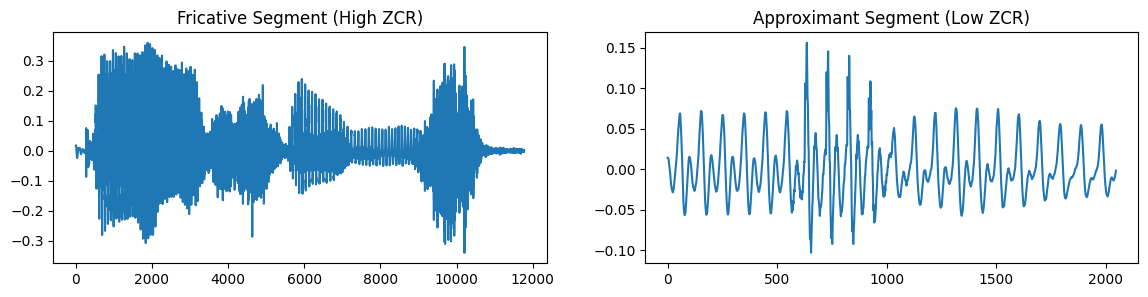

In [26]:
plt.figure(figsize=(14,3))

plt.subplot(1,2,1)
plt.plot(fricative_seg)
plt.title("Fricative Segment (High ZCR)")

plt.subplot(1,2,2)
plt.plot(approximant_seg)
plt.title("Approximant Segment (Low ZCR)")

plt.show()


In [27]:
import pandas as pd

data = [
    ["Fricative", np.max(zcr_values)],
    ["Approximant", np.min(zcr_values)]
]

df = pd.DataFrame(data, columns=["Phoneme Type", "ZCR"])

df


Phoneme Type       ZCR
0    Fricative  0.297139
1  Approximant  0.024512